<a href="https://colab.research.google.com/github/somya4/Machine-Learning-Project/blob/main/MLproject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

Import Dataset for Model

In [ ]:
df=pd.read_csv("/content/customer_personality_dataset (1).csv")

Data Analysis ⚛

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Customer_ID                 200 non-null    int64  
 1   Age                         200 non-null    int64  
 2   Gender                      200 non-null    object 
 3   Marital_Status              200 non-null    object 
 4   Children                    200 non-null    int64  
 5   Education                   200 non-null    object 
 6   Occupation                  200 non-null    object 
 7   Annual_Income               200 non-null    int64  
 8   Total_Spend                 200 non-null    int64  
 9   Purchase_Frequency          200 non-null    int64  
 10  Category_Fashion_Spend      200 non-null    int64  
 11  Category_Electronics_Spend  200 non-null    int64  
 12  Category_Grocery_Spend      200 non-null    int64  
 13  Website_Visits              200 non

In [ ]:
df.head()

,Customer_ID,Age,Gender,Marital_Status,Children,Education,Occupation,Annual_Income,Total_Spend,Purchase_Frequency,...,Avg_Time_on_App_Min,Email_Open_Rate,Loyalty_Points,Complaints_Made,Campaign_Response,Preferred_Channel,Enjoys_New_Products,Follows_Trends,Social_Activity_Level,Risk_Taking_Score
0,1,56,Female,Married,0,Graduate,Business,586594,146467,36,...,20.88,0.55,610,6,0,Social Media,2,2,2,2
1,2,46,Other,Divorced,0,Post Graduate,Freelancer,972608,152313,47,...,39.70,0.98,1727,0,1,SMS,4,3,4,3
2,3,32,Female,Single,1,Post Graduate,Salaried,1909351,108892,20,...,34.35,0.94,2290,2,0,Email,2,5,3,3
3,4,60,Other,Married,1,High School,Salaried,1940095,163768,19,...,9.92,0.04,1854,1,0,Social Media,2,3,2,5
4,5,25,Male,Divorced,2,High School,Salaried,1292501,75480,35,...,37.36,0.16,2608,4,1,Email,2,3,1,4


In [ ]:
df.tail()

,Customer_ID,Age,Gender,Marital_Status,Children,Education,Occupation,Annual_Income,Total_Spend,Purchase_Frequency,...,Avg_Time_on_App_Min,Email_Open_Rate,Loyalty_Points,Complaints_Made,Campaign_Response,Preferred_Channel,Enjoys_New_Products,Follows_Trends,Social_Activity_Level,Risk_Taking_Score
195,196,49,Other,Single,2,Post Graduate,Business,583152,159222,23,...,34.00,0.65,40,3,0,Social Media,4,3,1,5
196,197,49,Female,Single,0,High School,Student,1154652,9853,49,...,29.68,0.55,67,4,0,App,2,5,3,3
197,198,41,Female,Divorced,1,Doctorate,Salaried,294270,125900,9,...,31.51,0.06,987,7,0,Email,1,4,2,1
198,199,58,Other,Single,2,Post Graduate,Freelancer,1245482,157864,35,...,26.93,0.51,4008,0,1,Social Media,2,2,4,5
199,200,29,Other,Divorced,0,Post Graduate,Business,1791961,64129,20,...,8.74,0.81,3198,0,0,Social Media,1,5,2,2


In [ ]:
df.describe()

,Customer_ID,Age,Children,Annual_Income,Total_Spend,Purchase_Frequency,Category_Fashion_Spend,Category_Electronics_Spend,Category_Grocery_Spend,Website_Visits,Avg_Time_on_App_Min,Email_Open_Rate,Loyalty_Points,Complaints_Made,Campaign_Response,Enjoys_New_Products,Follows_Trends,Social_Activity_Level,Risk_Taking_Score
count,200.000000,200.000000,200.000000,2.000000e+02,200.000000,200.000000,200.000000,200.000000,200.000000,200.00000,200.000000,200.00000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,41.570000,1.380000,1.107866e+06,108031.005000,26.445000,25027.445000,35125.700000,14648.590000,100.45500,20.998050,0.49165,2377.535000,4.305000,0.465000,2.940000,3.100000,2.845000,2.905000
std,57.879185,13.715527,1.149874,4.905732e+05,57249.125079,14.310167,14245.204647,19292.424129,8703.361161,58.21523,11.344349,0.28388,1413.185101,2.888545,0.500025,1.458436,1.385496,1.460011,1.402071
min,1.000000,18.000000,0.000000,2.001260e+05,6622.000000,1.000000,1007.000000,281.000000,11.000000,2.00000,2.420000,0.00000,7.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,50.750000,30.000000,0.000000,6.911198e+05,59397.250000,15.000000,12821.000000,21743.750000,7088.000000,48.50000,10.457500,0.25000,1134.750000,2.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,100.500000,42.000000,1.000000,1.164488e+06,109919.500000,26.000000,25381.500000,33829.500000,13423.500000,106.00000,20.715000,0.51000,2287.500000,4.000000,0.000000,3.000000,3.000000,3.000000,3.000000
75%,150.250000,54.000000,2.000000,1.468754e+06,159474.500000,39.000000,35740.000000,50250.250000,22976.000000,150.00000,31.230000,0.73000,3607.500000,7.000000,1.000000,4.000000,4.000000,4.000000,4.000000
max,200.000000,64.000000,3.000000,1.986921e+06,199269.000000,49.000000,49838.000000,69350.000000,29259.000000,199.00000,39.870000,1.00000,4979.000000,9.000000,1.000000,5.000000,5.000000,5.000000,5.000000


In [ ]:
print(df.columns)

Index(['Customer_ID', 'Age', 'Gender', 'Marital_Status', 'Children',
       'Education', 'Occupation', 'Annual_Income', 'Total_Spend',
       'Purchase_Frequency', 'Category_Fashion_Spend',
       'Category_Electronics_Spend', 'Category_Grocery_Spend',
       'Website_Visits', 'Avg_Time_on_App_Min', 'Email_Open_Rate',
       'Loyalty_Points', 'Complaints_Made', 'Campaign_Response',
       'Preferred_Channel', 'Enjoys_New_Products', 'Follows_Trends',
       'Social_Activity_Level', 'Risk_Taking_Score'],
      dtype='object')


In [ ]:
df.isnull().sum()

,0
Customer_ID,0
Age,0
Gender,0
Marital_Status,0
Children,0
Education,0
Occupation,0
Annual_Income,0
Total_Spend,0
Purchase_Frequency,0


/tmp/ipython-input-212067875.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Annual_Income'])


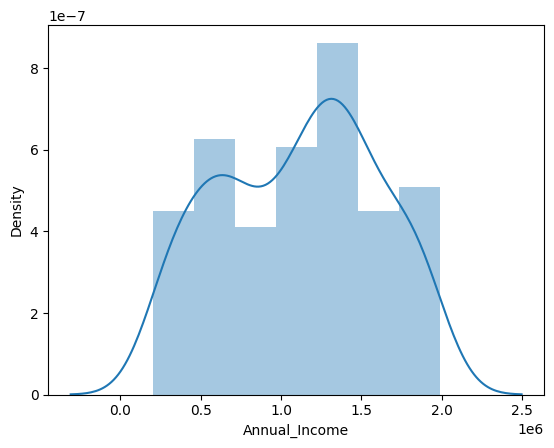

In [ ]:
sns.distplot(df['Annual_Income'])
plt.show()

In [ ]:
print(df.duplicated().sum())

0


In [ ]:
for column in df.columns:

    unique_features = df[column].unique()

    print(f"Unique values in '{column}'-")
    print(unique_features)
    print("\n")

Unique values in 'Customer_ID'-
[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200]


Unique values in 'Age'-
[56 46 32 60 25 38 36 40 28 41 53 57 20 39 19 61 47 55 50 29 42 44 59 45
 33 64 54 24 26 35 21 31 43 37 52 34 23 51 27 48 62 58 1

Data Preprocessing




In [ ]:
df.drop(columns='Customer_ID', inplace=True)
df = pd.get_dummies(df, columns=['Gender','Marital_Status','Education','Occupation','Preferred_Channel'], drop_first=True)

Exploratory Data Analysis (EDA)

In [ ]:
corr = df.corr()
print(corr['Risk_Taking_Score'].sort_values(ascending=False)[:5])

Risk_Taking_Score    1.000000
Annual_Income        0.140275
Website_Visits       0.096575
Income_per_Person    0.094722
Age_Group_Senior     0.092241
Name: Risk_Taking_Score, dtype: float64


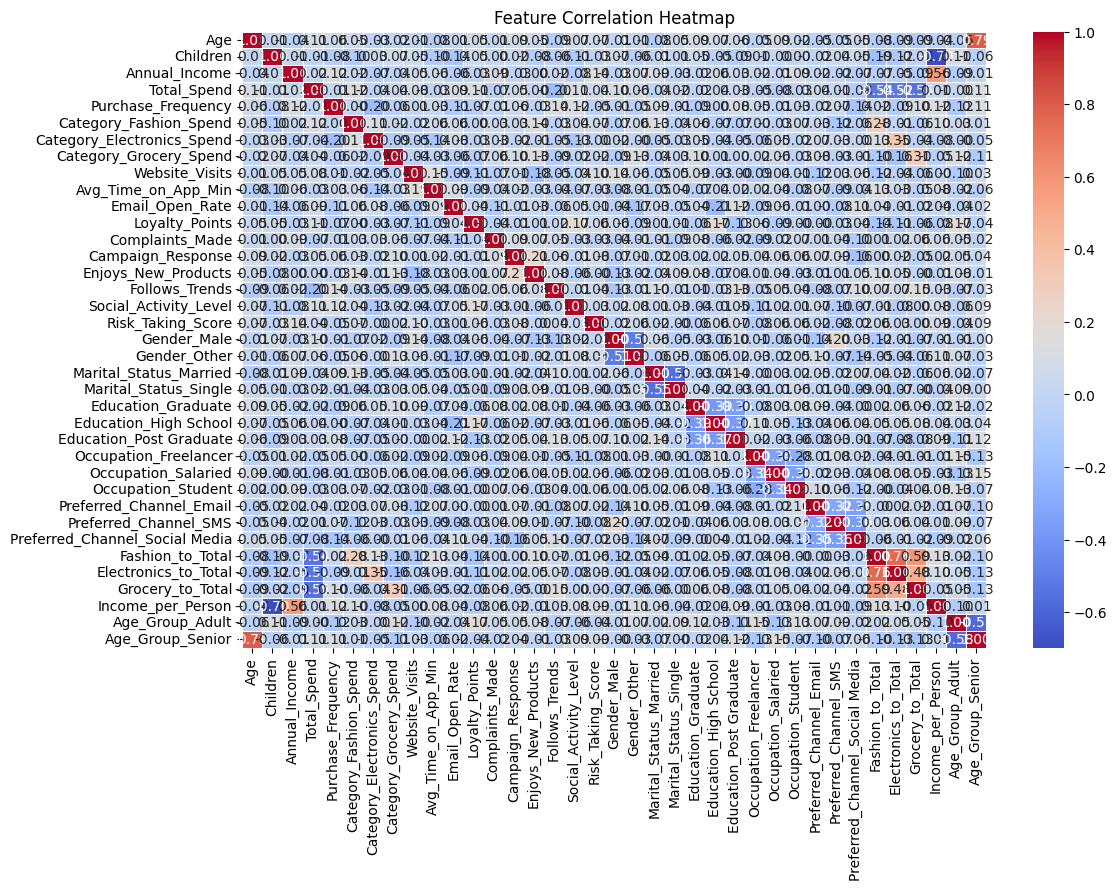

In [ ]:
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title('Feature Correlation Heatmap')
plt.show()

Feature Engineering

In [ ]:
df['Fashion_to_Total'] = df['Category_Fashion_Spend'] / df['Total_Spend']
df['Electronics_to_Total'] = df['Category_Electronics_Spend'] / df['Total_Spend']
df['Grocery_to_Total'] = df['Category_Grocery_Spend'] / df['Total_Spend']
df['Income_per_Person'] = df['Annual_Income'] / (df['Children'] + 1)
df['Age_Group'] = pd.cut(df['Age'], bins=[17,30,50,100], labels=['Young','Adult','Senior'])
df = pd.get_dummies(df, columns=['Age_Group'], drop_first=True)


/tmp/ipython-input-3467952813.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Income_per_Person'])


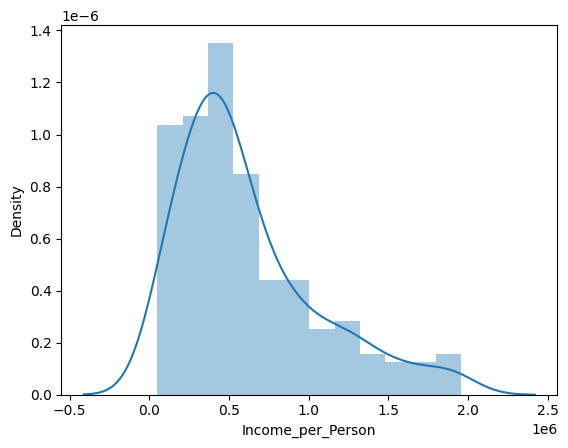

In [ ]:
sns.distplot(df['Income_per_Person'])
plt.show()

In [ ]:
print(df.columns)

Index(['Age', 'Children', 'Annual_Income', 'Total_Spend', 'Purchase_Frequency',
       'Category_Fashion_Spend', 'Category_Electronics_Spend',
       'Category_Grocery_Spend', 'Website_Visits', 'Avg_Time_on_App_Min',
       'Email_Open_Rate', 'Loyalty_Points', 'Complaints_Made',
       'Campaign_Response', 'Enjoys_New_Products', 'Follows_Trends',
       'Social_Activity_Level', 'Risk_Taking_Score', 'Gender_Male',
       'Gender_Other', 'Marital_Status_Married', 'Marital_Status_Single',
       'Education_Graduate', 'Education_High School',
       'Education_Post Graduate', 'Occupation_Freelancer',
       'Occupation_Salaried', 'Occupation_Student', 'Preferred_Channel_Email',
       'Preferred_Channel_SMS', 'Preferred_Channel_Social Media',
       'Fashion_to_Total', 'Electronics_to_Total', 'Grocery_to_Total',
       'Income_per_Person', 'Age_Group_Adult', 'Age_Group_Senior'],
      dtype='object')


Train-Test Split

In [ ]:
X = df.drop('Risk_Taking_Score', axis=1)
y = df['Risk_Taking_Score']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


Data Standardization

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)


Model Building

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, max_depth=None, random_state=42)
rf.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=42)

Hyperparameter Tuning with Cross-Validation


In [ ]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10]
}

grid_rf = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grid,
    cv=5,
    scoring='f1_macro '
)


grid_rf.fit(X_train_scaled, y_train)


best_rf = grid_rf.best_estimator_
print("Best RandomForest params:", grid_rf.best_params_)

Best RandomForest params: {'max_depth': None, 'n_estimators': 50}


Model Evaluation

In [ ]:
from sklearn.metrics import accuracy_score, f1_score
y_pred = best_rf.predict(X_test_scaled)
print("Random Forest - Accuracy:", accuracy_score(y_test, y_pred),
      "Macro F1:", f1_score(y_test, y_pred, average='macro'))

Random Forest - Accuracy: 0.25 Macro F1: 0.24685045948203843


Insights and Interpretation

In [ ]:

importances = best_rf.feature_importances_
indices = np.argsort(importances)[::-1]
top_feat = [(X.columns[i], importances[i]) for i in indices[:8]]
print("Top features by RF importance:", top_feat)


Top features by RF importance: [('Category_Grocery_Spend', np.float64(0.05638558717679894)), ('Category_Fashion_Spend', np.float64(0.053016851817109065)), ('Annual_Income', np.float64(0.05286432538624)), ('Category_Electronics_Spend', np.float64(0.05062738979332741)), ('Age', np.float64(0.05034077435086124)), ('Email_Open_Rate', np.float64(0.04894657893305926)), ('Loyalty_Points', np.float64(0.04817599809961672)), ('Grocery_to_Total', np.float64(0.04746282852848816))]
